In [6]:
import sys
sys.path.append('..')
import numpy as np
from IPython.display import display, HTML

# Visualizing Automatic Differentiation

Understanding how Automatic Differentation works can be daunting at first. To help the user understand Automatic Differentiation better, we have implemented a way to visualize each step of the algorithm. The user can visualize the algorithm in two ways: Computational Graph and Computational Table.

In this example, we will quickly outline how you can visualize the algorithm using these functions.

The examples are taken from the Harvard CS207 Course Repository[https://github.com/IACS-CS-207/cs207-F18/blob/master/lectures/L09/L9-Solutions.ipynb].

# Example 1:

Consider the example function
\begin{align}
f(x) = x - exp(-2sin^2(4x))
\end{align}

The user can initialize the function using our AD package as following:

In [7]:
from autodiff import *

x = Variable("x")
f = x - exp(-2*sin(4*x) ** 2)

One way to visualize what is going on is to represent the evaluation trace with a graph:

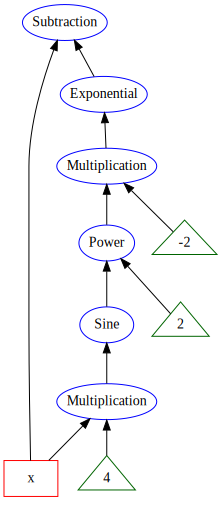

In [8]:
graph_f = f.get_comp_graph()
graph_f

Note that the triangular nodes represent constants, the square nodes represent the variables, and the circular nodes represent operators.

Let's find $f(\frac{\pi}{16})$. We can find the value by using the AD package again.

In [9]:
f(x = np.pi/16).value()

-0.17152990032208032

We can also examine the evaluation trace:

In [10]:
table_f = f.get_comp_table()
table_f

,Trace,Elementary Function,Current Value,Grad x value
0,x_1,x,0.196350,1.00
1,x_2,2,2.000000,0.00
2,x_3,4,4.000000,0.00
3,x_4,"Multiplication(x_3,x_1)",0.785398,4.00
4,x_5,Sine(x_4),0.707107,2.83
5,x_6,"Power(x_5,x_2)",0.500000,4.00
6,x_7,-2,-2.000000,0.00
7,x_8,"Multiplication(x_7,x_6)",-1.000000,-8.00
8,x_9,Exponential(x_8),0.367879,-2.94
9,x_10,"Subtraction(x_1,x_9)",-0.171530,3.94


Note that the value for the last row in the table is equal to our value from the AD package.

# Example 2:

Consider the example function
\begin{align}
f(x, y) = exp(-(sin(x) - cos(y))^2)
\end{align}

1. Draw the computational graph for the function provided.
2. Evaluate $f\left(\dfrac{\pi}{2}, \dfrac{\pi}{3}\right)$.
3. Compute $\dfrac{\partial f}{\partial x}\left(\dfrac{\pi}{2}, \dfrac{\pi}{3}\right)$ and $\dfrac{\partial f}{\partial y}\left(\dfrac{\pi}{2}, \dfrac{\pi}{3}\right)$ using the forward mode of AD.

In [11]:
x = Variable("x")
y = Variable("y")
f = exp(-(sin(x) - cos(y))**2)

### 1. Draw the computational graph for the function provided.

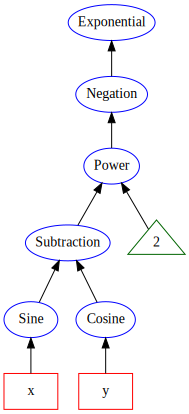

In [12]:
graph_f = f.get_comp_graph()
graph_f

### 2, Evaluate $f\left(\dfrac{\pi}{2}, \dfrac{\pi}{3}\right)$.

In [13]:
f(x = np.pi/2, y = np.pi/3).value()

0.778800783071405

### 3. Compute $\frac{\partial f}{\partial x}\left(\frac{\pi}{2}, \frac{\pi}{3}\right)$ and $\frac{\partial f}{\partial y}\left(\frac{\pi}{2}, \frac{\pi}{3}\right)$ using the forward mode of AD.

In [14]:
gradients = f(x = np.pi/2, y = np.pi/3).derivative()

In [15]:
gradients["x"]

-4.7687794308092406e-17

In [16]:
gradients["y"]

-0.6744612626270503

We can compare this with our computational table.

In [17]:
f(x = np.pi/2, y = np.pi/3).get_comp_table()

,Trace,Elementary Function,Current Value,Grad x value,Grad y value
0,x_1,x,1.570796,1.0,0.00
1,x_2,y,1.047198,0.0,1.00
2,x_3,2,2.000000,0.0,0.00
3,x_4,Cosine(x_2),0.500000,0.0,-0.87
4,x_5,Sine(x_1),1.000000,0.0,0.00
5,x_6,"Subtraction(x_5,x_4)",0.500000,0.0,0.87
6,x_7,"Power(x_6,x_3)",0.250000,0.0,0.87
7,x_8,Negation(x_7),-0.250000,-0.0,-0.87
8,x_9,Exponential(x_8),0.778801,-0.0,-0.67


Note that the value and gradients are equal to that from the computational table.